<a href="https://colab.research.google.com/github/SheikhSarvar/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

### ***Explore and analyze the data is start from importing the data***

In [34]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import norm
warnings.filterwarnings('ignore')
from numpy.core.numeric import correlate
correlate

<function numpy.correlate(a, v, mode='valid')>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA Project/encoded-Global Terrorism Data.csv')
pd.set_option('display.max_rows', 500)  # it is use for diplaying the complete table.
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 
dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

## ***Understanding the DataFrame***

***After Importing the Dataframe,
now take insights look in the given data
i.e what is inside over dataset and find important information for better understanding***

In [37]:
dataset.info()  ##prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [38]:
list(dataset.columns) # listing the columns name to better understanding...

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [39]:
print("There are {} rows and {} columns in the dataset".format(dataset.shape[0],dataset.shape[1]))

There are 181691 rows and 135 columns in the dataset


In [40]:
dataset.describe(include='all') ##used for calculation some statiscal data like percentile mean std of the numerical data of series of data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,181691,181270,181257,177135.000000,1.771340e+05,181685.000000,181691.000000,55495,115562,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,29011,181690.000000,181691.000000,181691.000000,181691.000000,181691,6314.000000,6314,428.000000,428,181691.000000,181691,171318.000000,171318,139141,181055,180132.000000,180132,11144.000000,11144,10685.000000,10685,10117,11020,10828.000000,10828,1176.000000,1176,1097.000000,1097,1026,1175,1147.000000,1147,181691,5890,2013,160,324,20,50561,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,19083,1890.000000,616.000000,616,318.000000,133.000000,133,4839.000000,181691.000000,181691,160923.000000,160923,13127.000000,13127,11542.000000,11542,1863.000000,1863,1693.000000,1693,73.000000,73,70.000000,70,114021,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,64065,3.898900e+04,57959,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,324,3305,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,514,10991.000000,10991,10400.000000,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,12,2855,36674,NaN,NaN,NaN,NaN,44109,112492,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,9,NaN,9,NaN,8,NaN,22,NaN,112,33238,86006,NaN,215,NaN,22,NaN,107,2691,5043,NaN,158,NaN,20,NaN,92,422,720,NaN,110,3537,1183,433,60,116,14,14490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,9,NaN,NaN,8,NaN,NaN,12,NaN,30,NaN,11,NaN,28,NaN,10,NaN,22,NaN,5,NaN,16,19148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,19157,NaN,NaN,NaN,NaN,NaN,143,217,NaN,NaN,NaN,NaN,NaN,387,NaN,7,NaN,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,Middle East & North Africa,Baghdad,Unknown,NaN,NaN,NaN,NaN,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",NaN,NaN,NaN,NaN,NaN,Insurgency/Guerilla Action,NaN,NaN,NaN,NaN,Bombing/Explosion,NaN,Armed Assault,NaN,Facility/Infrastructure Attack,NaN,Private Citizens & Property,NaN,Unnamed Civilian/Unspecified,Unknown,Civilians,NaN,Iraq,NaN,Private Citizens & Property,NaN,Unnamed Civilian/Unspecified,Not Applicable,Civilians,NaN,Iraq,NaN,Private Citizens & Property,NaN,Unnamed Civilian/Unspecified,Not Applicable,Civilians,NaN,Iraq,Unknown,Militants,Al-Nusrah Front,The Fami

In [41]:
dataset.head(10)  #use for displaying the first n number of rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [42]:
dataset.tail(10) # use for displaying the last n number of rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181681,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Shariff Aguak,6.862806,124.443649,1.0,0,The incident occurred in the Poblacion Mother ...,12/31/2017: A roadside bomb detonated targetin...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Philippine National Police (PNP),Patrol,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A roadside bomb was used in the attack.,1.0,0.0,0.0,5.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A police vehicle was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The victims included Senior Police Officer 4 M...,"""3 dead, scores injured in Mindanao blasts,"" M...","""Cop, 2 others killed in bomb blasts in Mindan...","""Cop killed, 7 injured in Maguindanao IED blas...",START Primary Collection,0,0,0,0,NaN
181682,2.017120e+11,2017,12,31,NaN,0,NaN,98,Italy,8,Western Europe,Marche,Spinetoli,42.888982,13.772795,1.0,0,The incident occurred in the Ascoli Piceno dis...,12/31/2017: Assailants set fire to a migrants'...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,65.0,Refugee (including Camps/IDP/Asylum Seekers),Unknown,Migrant Center,98.0,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,"The specific motive is unknown; however, sourc...",0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,18.0,Arson/Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,A migrants' center was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Arson attack probed as racial crime,"" Ansa.it...","""Ascoli, a building destined for migrants goes...",NaN,START Primary Collection,-9,-9,0,-9,NaN
181683,2.017120e+11,2017,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,Faryab,Kohistan district,35.315467,64.815508,3.0,0,NaN,12/31/2017: Assailants attacked the house of a...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,17,Terrorists/Non-State Militia,94.0,Non-State Militia,National Uprising Movement (NUM),House of Member,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taliban,NaN,NaN,NaN,NaN,Na

From above result, we can clearly see that we have a lot of missing values or NaN values

In [43]:
dataset.fillna(0) # It is use for filling missing value with zero 
dataset.fillna('0', inplace=True)
dataset.replace(np.nan, 0)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,0,0,0,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,1.0,0,0,0,1,1,1,0.0,0,0,0.0,1,0,1,Assassination,0,0,0,0,14,Private Citizens & Property,68.0,Named Civilian,0,Julio Guzman,58.0,Dominican Republic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MANO-D,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,PGIS,0,0,0,0,0
1,1.970000e+11,1970,0,0,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,0,0,1,1,1,0.0,0,0,0.0,1,0,6,Hostage Taking (Kidnapping),0,0,0,0,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23rd of September Communist League,0,0,0,0,0,0,0.0,0,0,0,7.0,0,0,0,0,0,0,0,0,0,0,0,13,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,1.0,1.0,0.0,0,0,0,Mexico,1.0,800000.0,0,0,0,0,0,0,0,0,0,0,0,PGIS,0,1,1,1,0
2,1.970010e+11,1970,1,0,0,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,0,0,1,1,1,0.0,0,0,0.0,1,0,1,Assassination,0,0,0,0,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,PGIS,-9,-9,1,1,0
3,1.970010e+11,1970,1,0,0,0,0,78,Greece,8,Western Europe,Attica,Athens,37.99749,23.762728,1.0,0,0,0,1,1,1,0.0,0,0,0.0,1,0,3,Bombing/Explosion,0,0,0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Embassy,217.0,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,Explosives,16.0,Unknown Explosive Type,0,0,0,0,0,0,0,0,0,0,0,0,Explosive,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,PGIS,-9,-9,1,1,0
4,1.970010e+11,1970,1,0,0,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,0,0,1,1,1,-9.0,0,0,0.0,1,0,7,Facility/Infrastructure Attack,0,0,0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Consulate,217.0,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,Incendiary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Incendiary,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,PGIS,-9,-9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [44]:
dataset.isnull().sum() #give total number of null value in each column and later that column will remove over analysis
#dataset has been updated thats why it show total number of missing value in updated dataset

eventid               0
iyear                 0
imonth                0
iday                  0
approxdate            0
extended              0
resolution            0
country               0
country_txt           0
region                0
region_txt            0
provstate             0
city                  0
latitude              0
longitude             0
specificity           0
vicinity              0
location              0
summary               0
crit1                 0
crit2                 0
crit3                 0
doubtterr             0
alternative           0
alternative_txt       0
multiple              0
success               0
suicide               0
attacktype1           0
attacktype1_txt       0
attacktype2           0
attacktype2_txt       0
attacktype3           0
attacktype3_txt       0
targtype1             0
targtype1_txt         0
targsubtype1          0
targsubtype1_txt      0
corp1                 0
target1               0
natlty1               0
natlty1_txt     

from the above cell result we can clearly that there is lot of column which is not use in analysis, so we remove it 

In [45]:
df=dataset.rename(columns={'iyear':'year','imonth':'month','iday':'day','weaptype1_txt':'weapon_type',
                            'provstate':'State','city':'city','attacktype1_txt':'attack_type','target1':'target','targtype1_txt':'target_type'
                            ,'nkill':'killed','nwound':'wound','summary':'summary','gname':'group','motive':'motive'} , inplace=True)

In [46]:
df=dataset[['year','month','day','country','country_txt','State','region','region_txt','city','latitude','longitude','attack_type','killed','wound','target','summary','weapon_type','group','target_type','motive']]

In [47]:
df.nunique()

year               47
month              13
day                32
country           205
country_txt       205
State            2856
region             12
region_txt         12
city            36675
latitude        48323
longitude       48040
attack_type         9
killed            206
wound             239
target          86007
summary        112493
weapon_type        12
group            3537
target_type        22
motive          14491
dtype: int64

after the understanding the variable and removing the useless data:-- 

## **Relationship Analysis Correlation analysis**
 **finding the correlation between the variable using heatmap and pair plot etc.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd55279b110>,
      dtype=object)

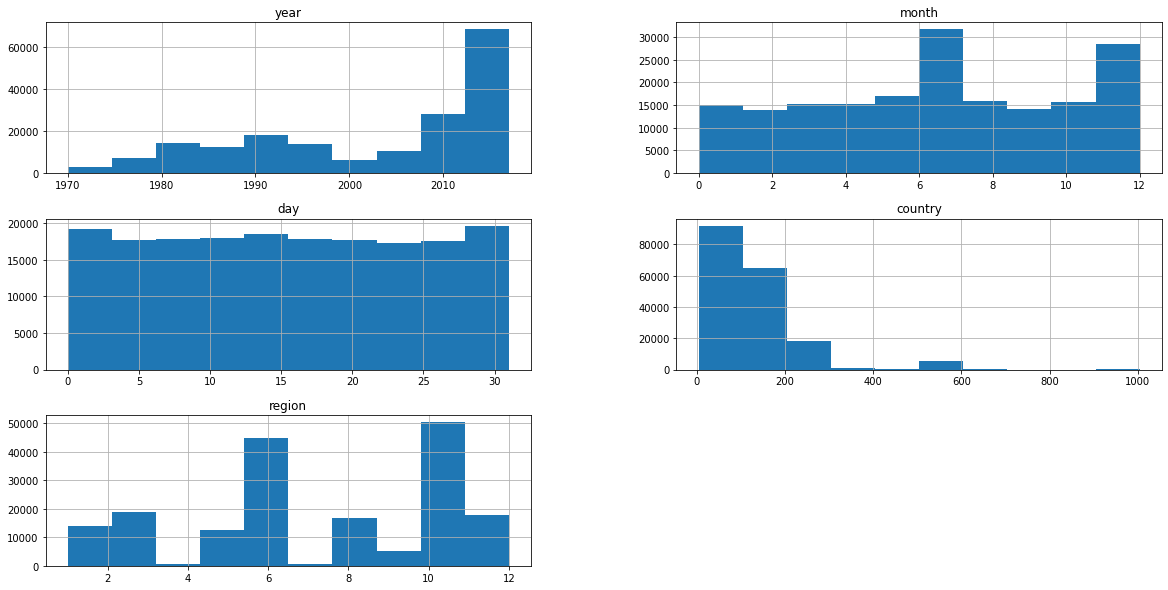

In [48]:
df.hist(figsize=(20,10))

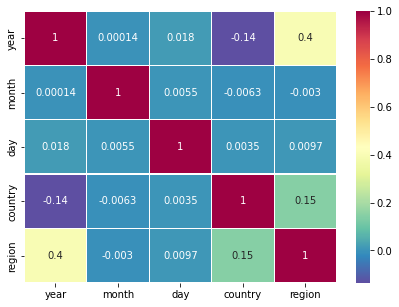

In [49]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(7, 5))
sns.heatmap(corrmat,cbar=True,annot=True, ax = ax, cmap ="Spectral_r", linewidths = 0.2)


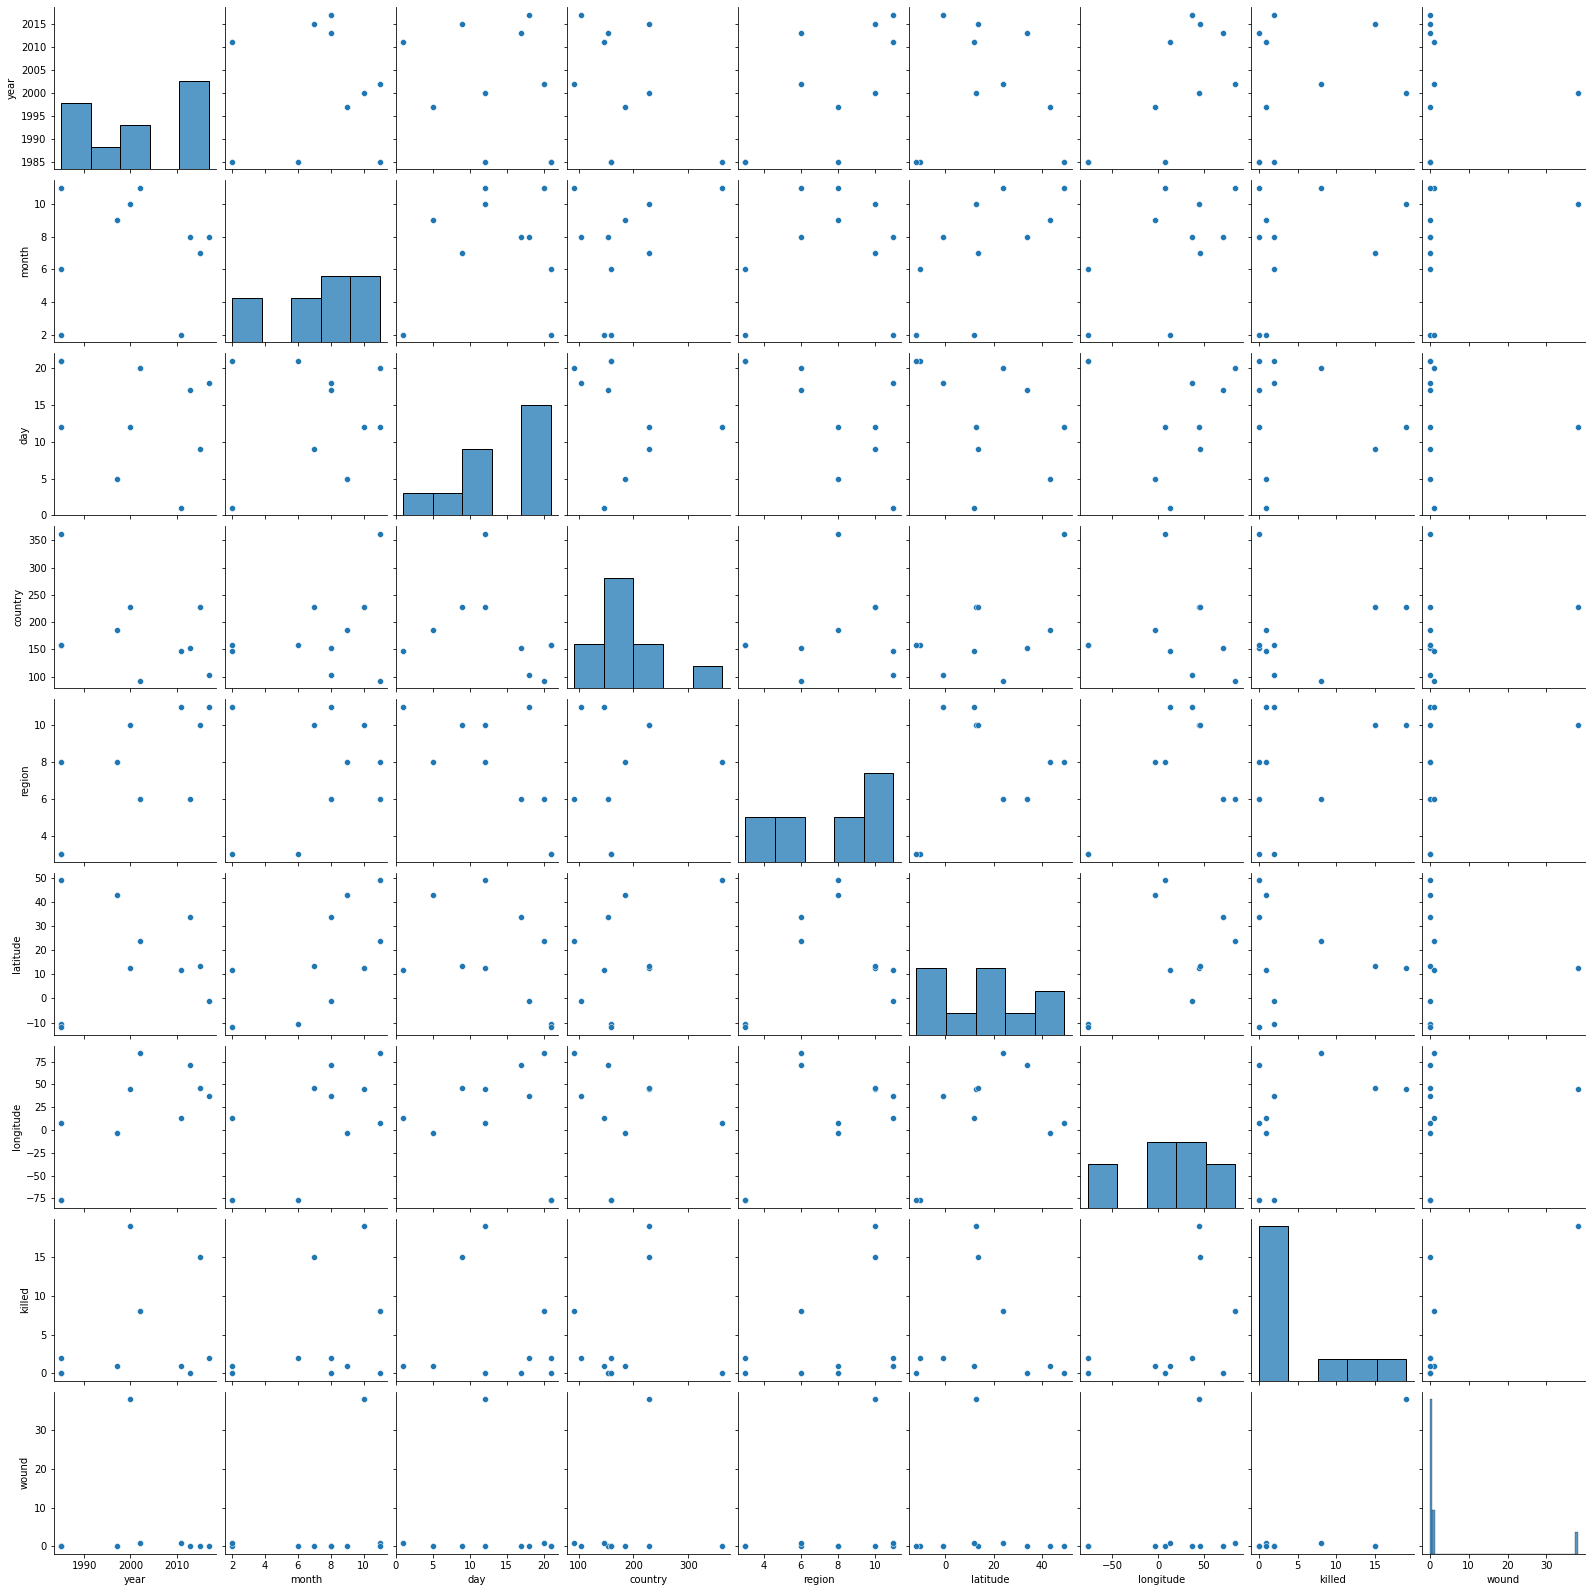

In [50]:
sns.pairplot(df.sample(10)) 

# ***Visualization the variable for pridiction***

start plotting the plot for better understanding the dataframe


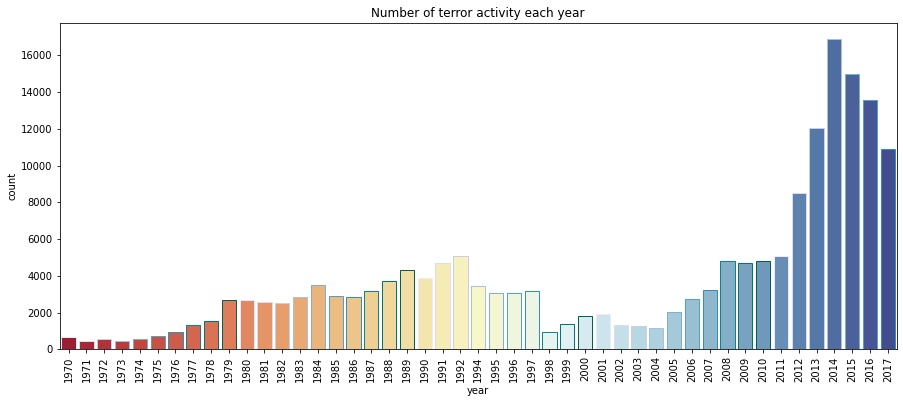

In [51]:
plt.subplots(figsize=(15,6))
sns.countplot('year',data=df,palette='RdYlBu',edgecolor=sns.color_palette('PuBuGn',10))
plt.xticks(rotation=90)
plt.title('Number of terror activity each year')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

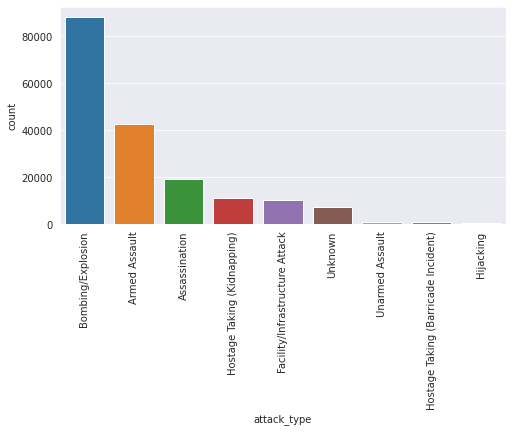

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.countplot(x='attack_type',data=df,order=df['attack_type'].value_counts().index)
plt.xticks(rotation=90)


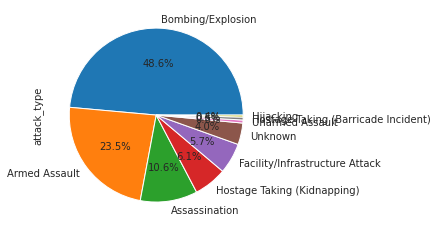

In [53]:
#Pie chart for the above result
df['attack_type'].value_counts().head(10).plot.pie(autopct="%.1f%%")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

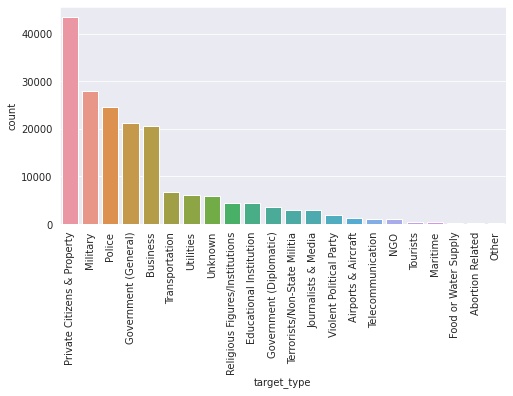

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.countplot(x='target_type',data=df,order=df['target_type'].value_counts().index)
plt.xticks(rotation=90)

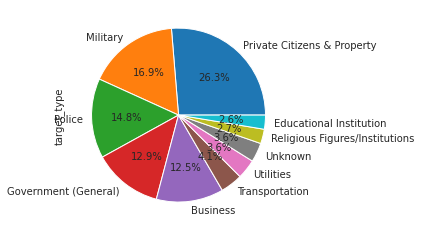

In [55]:
#Pie chart supporting the above result
df["target_type"].value_counts().head(10).plot.pie(autopct="%.1f%%")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

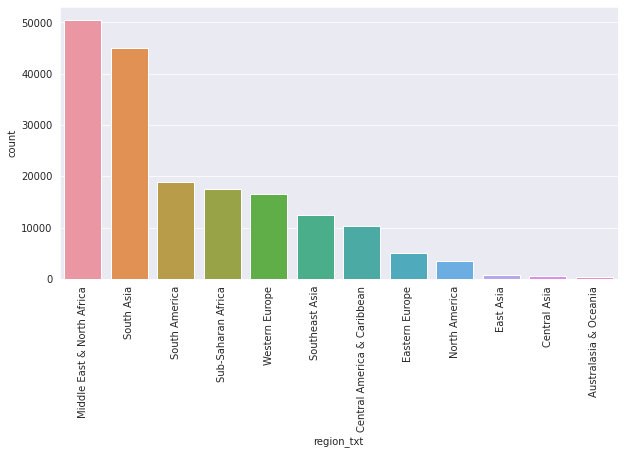

In [56]:
# Plotting a graph of count of terrorism attacks vs the REGIONS
plt.figure(figsize=(10,5))
sns.countplot(x=df["region_txt"],order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
#print(df["region_txt"].value_counts())

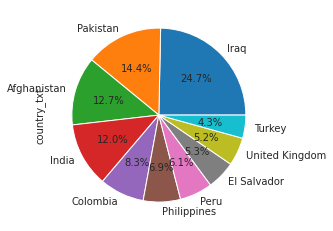

In [57]:
#Forming a pie chart showing the above result
df['country_txt'].value_counts().head(10).plot.pie(autopct="%.1f%%")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

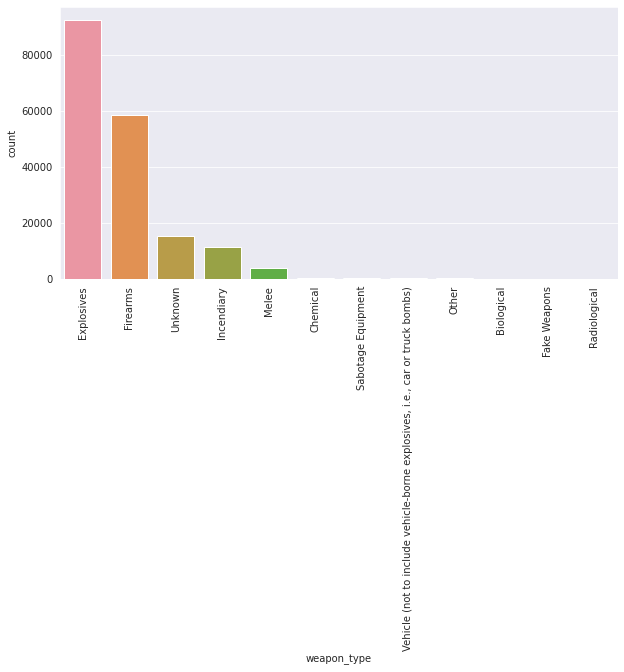

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["weapon_type"],order=df['weapon_type'].value_counts().index)
plt.xticks(rotation=90)

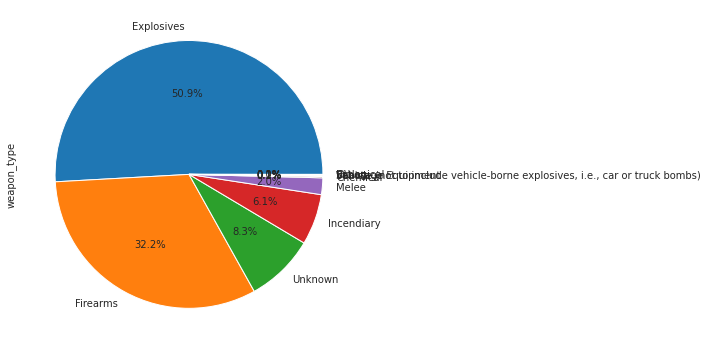

In [59]:
#Pie chart to show which weapon type is most famously used by terrorists
plt.figure(figsize=(6,8))
df["weapon_type"].value_counts().head(10).plot.pie(autopct="%.1f%%")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

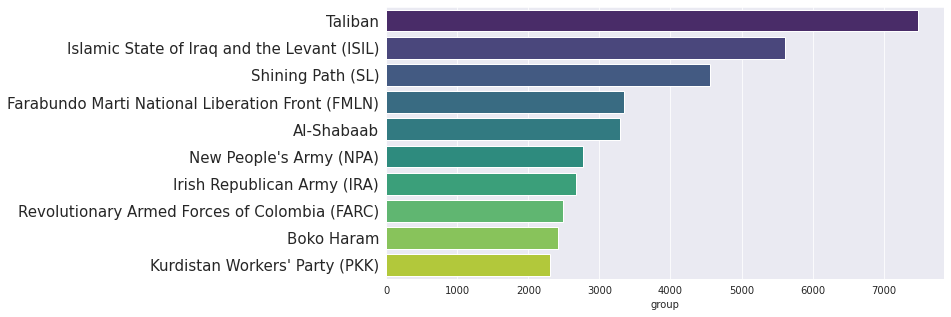

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["group"].value_counts()[1:11],y=df["group"].value_counts()[1:11].index,palette='viridis')
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)

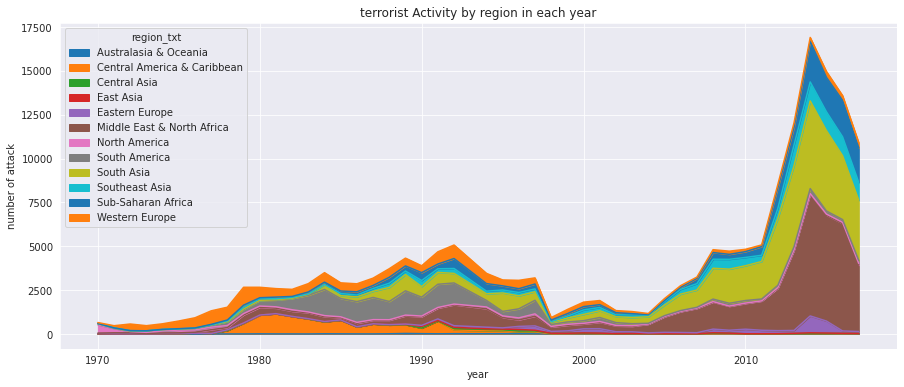

In [61]:
pd.crosstab(df.year, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('terrorist Activity by region in each year')
plt.ylabel('number of attack')    
plt.show()

# ***CONCLUSION***

###1.Iraq is the hot zone of terrorism
###2.Maximum terrorism has occured in Middle East and North Africa.
###3.Most of the events has occured Iraq following Pakistan,Afganistan,India.
###4.Most targetted places are Private Citizens & Property,Military,police,government.
###5.Year 2014 accounts for the highest target.
###6.Explosives are mostly used weapons,follwed by firearms,unknown etc.
### 7.The frequent terror groups named Taliban,Islamic State of Iraq and the Levant (ISIL),etc.

## **Thank You**